1. DATA LOADING AND PREPROCESSING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

Load Data

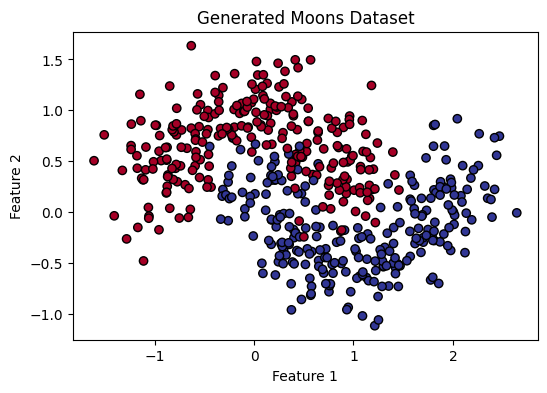

In [2]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)

plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
plt.title("Generated Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Create Hold-Out Set

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")


Training set size: 350 samples
Validation set size: 150 samples


Standardized Features

In [4]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_val_scaled = scaler.transform(X_val)

print("\nFeatures standardized. Data is ready for training.")


Features standardized. Data is ready for training.


2. LINEAR SVM MODEL

Train Model

In [5]:
from sklearn.svm import SVC

linear_model = SVC(kernel='linear', C=1.0, random_state=42)
linear_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

Evaluate

In [6]:
linear_predictions = linear_model.predict(X_val_scaled)
linear_accuracy = accuracy_score(y_val, linear_predictions)

print("Linear SVM (C=1.0) Evaluation")
print(f"Validation Accuracy: {linear_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, linear_predictions))

Linear SVM (C=1.0) Evaluation
Validation Accuracy: 0.8533

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        75
           1       0.86      0.84      0.85        75

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



Analyze

3. THE KERNEL TRICK

RBF Model

In [7]:
rbf_model = SVC(kernel='rbf', C=1.0, random_state=42)
rbf_model.fit(X_train_scaled, y_train)

# Evaluate
rbf_predictions = rbf_model.predict(X_val_scaled)
rbf_accuracy = accuracy_score(y_val, rbf_predictions)

print("RBF Kernel SVM Evaluation")
print(f"Validation Accuracy: {rbf_accuracy:.4f}")
print("\nClassification Report (RBF):")
print(classification_report(y_val, rbf_predictions))

RBF Kernel SVM Evaluation
Validation Accuracy: 0.9467

Classification Report (RBF):
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        75
           1       0.99      0.91      0.94        75

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



Polynomial Kernel Model

In [8]:
poly_model = SVC(kernel='poly', degree=3, random_state=42)
poly_model.fit(X_train_scaled, y_train)

# Evaluate
poly_predictions = poly_model.predict(X_val_scaled)
poly_accuracy = accuracy_score(y_val, poly_predictions)

print("\n--- Polynomial Kernel SVM Evaluation (Default degree=3) ---")
print(f"Validation Accuracy: {poly_accuracy:.4f}")
print("\nClassification Report (Polynomial):")
print(classification_report(y_val, poly_predictions))


--- Polynomial Kernel SVM Evaluation (Default degree=3) ---
Validation Accuracy: 0.8733

Classification Report (Polynomial):
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        75
           1       0.92      0.81      0.87        75

    accuracy                           0.87       150
   macro avg       0.88      0.87      0.87       150
weighted avg       0.88      0.87      0.87       150



Analyze

In [9]:
print("\nKernel Comparison")
comparison_data = {
    "Kernel": ["Linear", "RBF", "Polynomial"],
    "Validation Accuracy": [
        f"{linear_accuracy:.4f}",
        f"{rbf_accuracy:.4f}",
        f"{poly_accuracy:.4f}"
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_markdown(index=False))


Kernel Comparison
| Kernel     |   Validation Accuracy |
|:-----------|----------------------:|
| Linear     |                0.8533 |
| RBF        |                0.9467 |
| Polynomial |                0.8733 |



Analysis:
The RBF kernel performed best with default settings. This is expected because the 'moons' dataset has a complex, curved boundary that the RBF kernel is highly effective at separating. The linear kernel failed because the data is not linearly separable.


4. HYPERPARAMETER TUNING WITH GridSearch/CV

Define Search Space

In [10]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['rbf']
}

Set Up Grid Search

In [11]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(random_state=42), param_grid, refit=True, verbose=2, cv=5, scoring='accuracy')

Run grid search

In [12]:
print("\nRunning GridSearchCV (5-fold cross-validation)...")
grid.fit(X_train_scaled, y_train)


Running GridSearchCV (5-fold cross-validation)...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

Analyze result

In [13]:
print("\nGrid Search Results")
print("Best Hyperparameters found (C and gamma):")
print(grid.best_params_)

print("\nBest cross-validated Accuracy Score:")
print(f"{grid.best_score_:.4f}")

# Store best model for final evaluation
best_rbf_model = grid.best_estimator_


Grid Search Results
Best Hyperparameters found (C and gamma):
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

Best cross-validated Accuracy Score:
0.9514


5. FINAL EVALUATION AND VISUALIZATION

Evaluate final model

Final Tuned Model Evaluation on 30% Hold-Out Set
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        75
           1       1.00      0.93      0.97        75

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



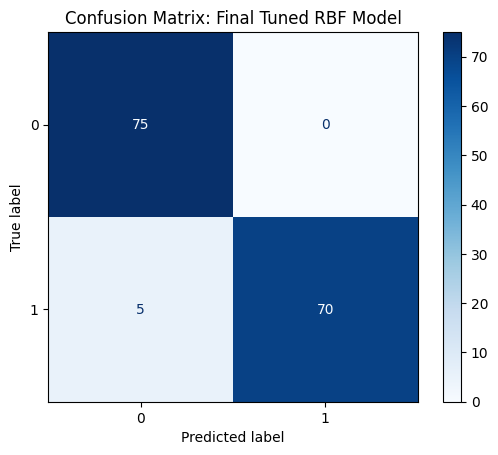

In [14]:
final_predictions = grid.predict(X_val_scaled)

print("Final Tuned Model Evaluation on 30% Hold-Out Set")
print("Classification Report:")
print(classification_report(y_val, final_predictions))

# Generate and plot Confusion Matrix
cm = confusion_matrix(y_val, final_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_val))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Final Tuned RBF Model")
plt.show()

Visual decision boundaries

In [15]:
def plot_decision_boundary(ax, model, X, y, title):
    # Determine grid limits
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    # Create mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict over the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and the data points
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())

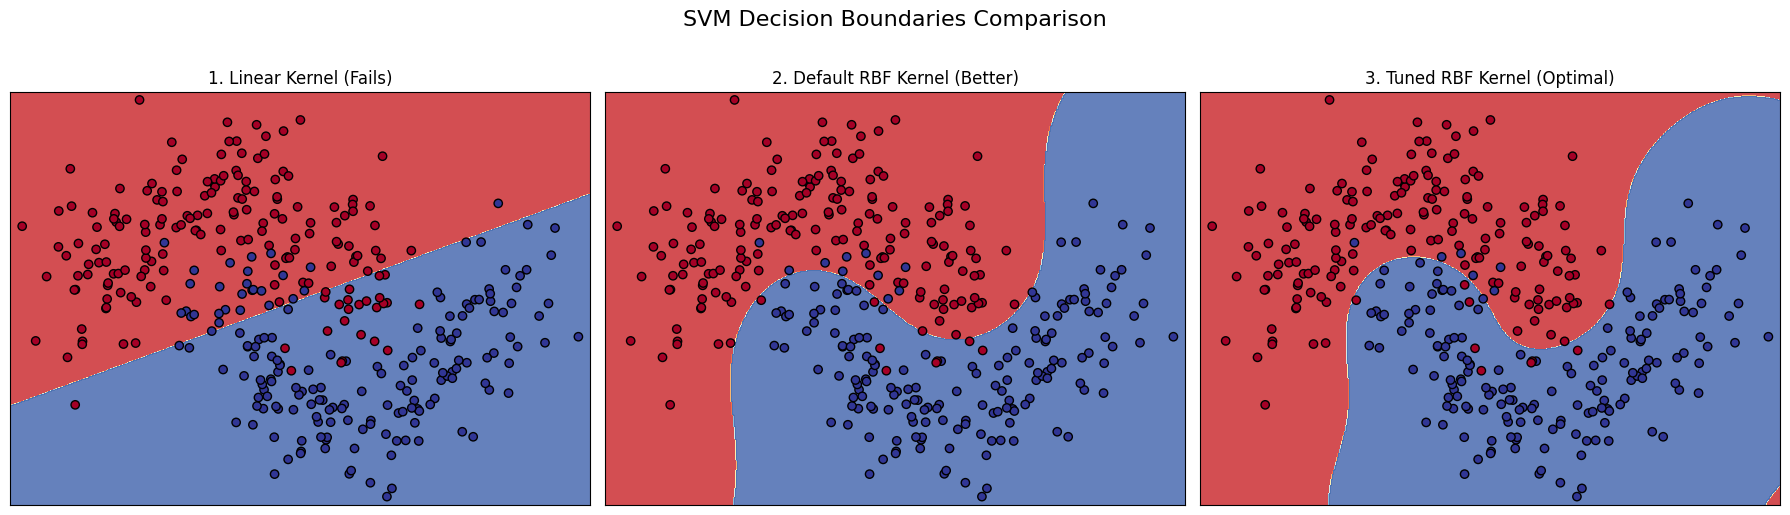

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
X_plot = X_train_scaled

plot_decision_boundary(axes[0], linear_model, X_plot, y_train, "1. Linear Kernel (Fails)")
plot_decision_boundary(axes[1], rbf_model, X_plot, y_train, "2. Default RBF Kernel (Better)")
plot_decision_boundary(axes[2], best_rbf_model, X_plot, y_train, "3. Tuned RBF Kernel (Optimal)")

plt.suptitle("SVM Decision Boundaries Comparison", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()